
# Result Analysis on VGGNet

In [1]:
import os
import sys

ROOT_PATH = os.getcwd()
ROOT_PATH = os.path.dirname(ROOT_PATH)
ROOT_PATH = os.path.dirname(ROOT_PATH)
sys.path.append(ROOT_PATH)


In [2]:
import pandas as pd
import numpy as np

import dataset
import evaluate
import metric
import util
import visualize
import densenet169

Using TensorFlow backend.


## Training

Let's train a model that takes in all body parts first.
The model use a 16 layer VGGNet with 3 colour channels. All weights are randomly initialized. It uses Adom optimizer with 
    beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False

Image perturbation includes:
    rotation_range=30,
    fill_mode="constant",
    cval=0,
    horizontal_flip=True
    
All images are resized to 224*224 px

In [3]:
# Training Configurations
bpart = "all"
grayscale = False
batch_size = 16
learning_rate = 0.0001
epochs = 20
weight="imagenet"
resize=True
decay=0
reload=True

In [4]:
model = densenet169.DenseNet169(grayscale=grayscale, weight=weight, resize=resize)
history, model_path, result_path = model.train(batch_size=batch_size, learning_rate=learning_rate, epochs=epochs, bpart=bpart, decay=decay, reload=reload)

****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 19-00-13
Epoch 1/20
 - 1336s - loss: 0.5236 - binary_accuracy: 0.7506 - batch_recall: 0.5997 - global_recall: 0.5843 - global_kappa: 0.4637 - val_loss: 0.5748 - val_binary_accuracy: 0.7263 - val_batch_recall: 0.2399 - val_global_recall: 0.4582 - val_global_kappa: 0.4394
Epoch 2/20
 - 1036s - loss: 0.4728 - binary_accuracy: 0.7880 - batch_recall: 0.6547 - global_recall: 0.6388 - global_kappa: 0.5454 - val_loss: 0.4471 - val_binary_accuracy: 0.7995 - val_batch_recall: 0.3758 - val_global_recall: 0.7150 - val_global_kappa: 0.5953
Epoch 3/20
 - 1027s - loss: 0.4577 - binary_accuracy: 0.7982 - batch_recall: 0.6702 - global_recall: 0.6554 - global_kappa: 0.5680 - val_loss: 0.4748 - val_binary_accuracy: 0.7820 - val_batch_recall: 0.3562 - val_global_recall: 0.6778 - val_global_kappa: 0.5592
Epoch 4/20
 - 985s - loss: 0.4443 - binary_accuracy: 0.8053

#### Training history

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


d:\code\mura\env\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['resize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


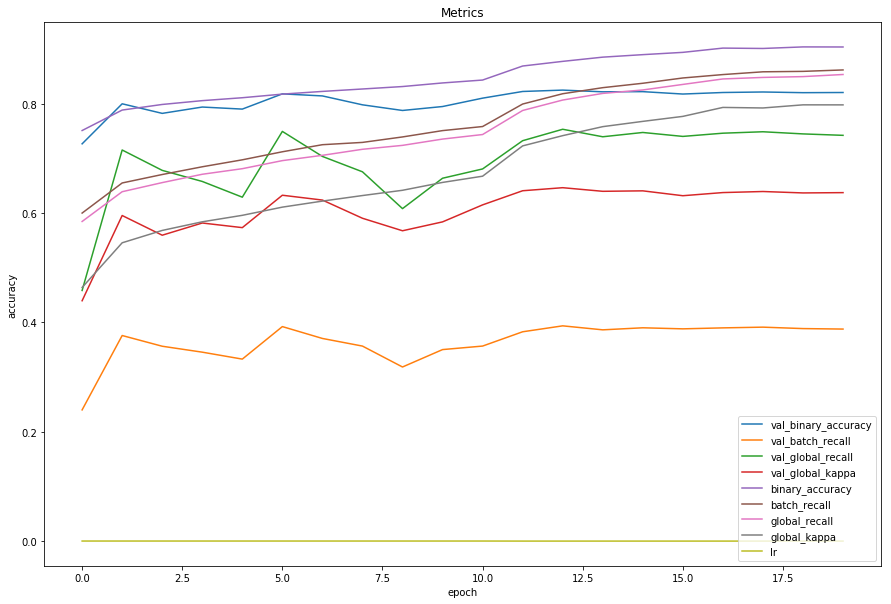

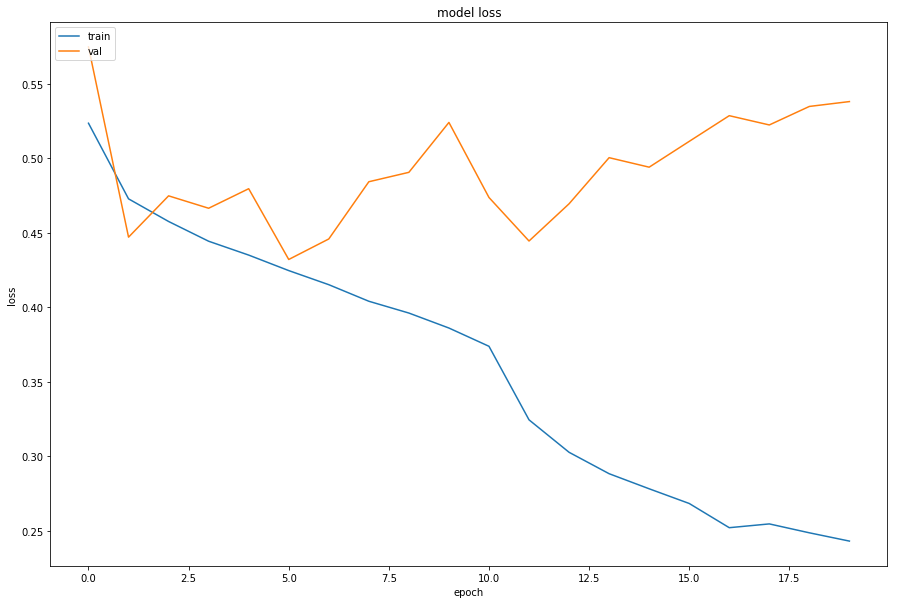

In [6]:
visualize.plot_history(history)

### Metrics

In [7]:
val_df = pd.read_csv(result_path)
evaluate.evl_result(val_df)

****** Evaluation per Image
Accuracy:  0.8176415389427588
Recall:    0.7490196078431373
Precision: 0.8520446096654275
Kappa:     0.632787560275234
Contingency Table:
 1146            199
  384           1468
Number of Inputs: 3197
****** Evaluation per Study Using Highest Score
Accuracy:  0.8148457047539617
Recall:    0.828996282527881
Precision: 0.7743055555555556
Kappa:     0.6281962816555151
Contingency Table:
  446            130
   92            531
Number of Inputs: 1199
****** Evaluation per Study Using Lowest Score
Accuracy:  0.8031693077564637
Recall:    0.6319702602230484
Precision: 0.8994708994708994
Kappa:     0.5908299544794633
Contingency Table:
  340             38
  198            623
Number of Inputs: 1199
****** Evaluation per Study Using Average Score
Accuracy:  0.8323603002502085
Recall:    0.7434944237918215
Precision: 0.8639308855291576
Kappa:     0.6567019605105899
Contingency Table:
  400             63
  138            598
Number of Inputs: 1199


Both averaging or picking the max prediction score from each image of the same study achieves the better overall result. Apperantly having more images helps the model determing whether there is an abnormal.

Interestingly, averaging the prediction score from each image of the same study achieves the best kappa. It does make sense however compare to the other aggregation, since averaging does not favor false positive or false negative.

#### Let's look at each body part

In [8]:
for g, df in val_df.groupby(val_df["body_part"]):
    print("****** Evaluation per body part: {} ******".format(g))
    evaluate.evl_result(df)
    print("\n\n")

****** Evaluation per body part: elbow ******
****** Evaluation per Image
Accuracy:  0.864516129032258
Recall:    0.8043478260869565
Precision: 0.9113300492610837
Kappa:     0.7286620664104104
Contingency Table:
  185             18
   45            217
Number of Inputs: 465
****** Evaluation per Study Using Highest Score
Accuracy:  0.8481012658227848
Recall:    0.8333333333333334
Precision: 0.8088235294117647
Kappa:     0.689078386356182
Contingency Table:
   55             13
   11             79
Number of Inputs: 158
****** Evaluation per Study Using Lowest Score
Accuracy:  0.8354430379746836
Recall:    0.6666666666666666
Precision: 0.9166666666666666
Kappa:     0.648167180541281
Contingency Table:
   44              4
   22             88
Number of Inputs: 158
****** Evaluation per Study Using Average Score
Accuracy:  0.8670886075949367
Recall:    0.7424242424242424
Precision: 0.9245283018867925
Kappa:     0.7189564628155172
Contingency Table:
   49              4
   17            